In [1]:
import pandas as pd 
df = pd.read_csv("reviews.csv",nrows=20000)
df.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,helpful,total,review,sentiment
0,A32T2H8150OJLU,B00000JBLH,ARH,5.0,1094169600,"09 3, 2004",3,4,bought first hp c served faithfully lost trave...,positive
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""",5.0,1197676800,"12 15, 2007",7,9,belated review feel obliged share view old wor...,positive
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,2.0,1293840000,"01 1, 2011",3,3,hp gx kicking twenty year hp year old still fl...,negative
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,5.0,1145404800,"04 19, 2006",7,8,started finance stuff recently went looking go...,positive
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,5.0,1375574400,"08 4, 2013",0,0,simple calculation discounted cash flow one st...,positive


In [2]:
df['review'] = df["review"].astype(str)


<AxesSubplot:>

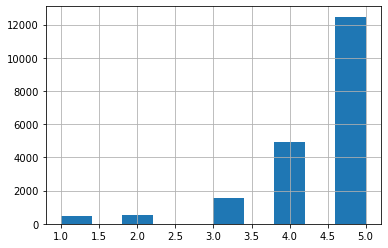

In [3]:
df['overall'].hist()

In [4]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfm = pd.merge(df, count, how='right', on=['asin'])
dfm.head()

,reviewerID_x,asin,reviewerName_x,overall_x,unixReviewTime_x,reviewTime_x,helpful_x,total_x,review_x,sentiment_x,reviewerID_y,reviewerName_y,overall_y,unixReviewTime_y,reviewTime_y,helpful_y,total_y,review_y,sentiment_y
0,A32T2H8150OJLU,B00000JBLH,ARH,5.0,1094169600,"09 3, 2004",3,4,bought first hp c served faithfully lost trave...,positive,8,8,8,8,8,8,8,8,8
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""",5.0,1197676800,"12 15, 2007",7,9,belated review feel obliged share view old wor...,positive,8,8,8,8,8,8,8,8,8
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,2.0,1293840000,"01 1, 2011",3,3,hp gx kicking twenty year hp year old still fl...,negative,8,8,8,8,8,8,8,8,8
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,5.0,1145404800,"04 19, 2006",7,8,started finance stuff recently went looking go...,positive,8,8,8,8,8,8,8,8,8
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,5.0,1375574400,"08 4, 2013",0,0,simple calculation discounted cash flow one st...,positive,8,8,8,8,8,8,8,8,8


In [5]:
dfm["totalReviewers"] = dfm["reviewerID_y"]
dfm["overallScore"] = dfm["overall_x"]
dfm["review"] = dfm["review_x"]

dfNew = dfm[['asin','review','overallScore',"totalReviewers"]]
dfNew

,asin,review,overallScore,totalReviewers
0,B00000JBLH,bought first hp c served faithfully lost trave...,5.0,8
1,B00000JBLH,belated review feel obliged share view old wor...,5.0,8
2,B00000JBLH,hp gx kicking twenty year hp year old still fl...,2.0,8
3,B00000JBLH,started finance stuff recently went looking go...,5.0,8
4,B00000JBLH,simple calculation discounted cash flow one st...,5.0,8
...,...,...,...,...
19995,B0027CTFBO,used banker box moving storage past similar co...,4.0,112
19996,B0027CTFBO,quite bit clothing shoe sorting decide donate ...,5.0,112
19997,B0027CTFBO,moving box great design number tell order putt...,5.0,112
19998,B0027CTFBO,large medium box difference medium size put he...,4.0,112


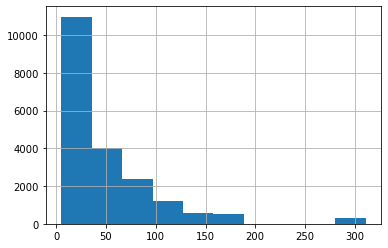

In [6]:
dfm['totalReviewers'].hist()
dfm = dfm.sort_values(by='totalReviewers', ascending=False)
dfm = dfm[dfm.totalReviewers >= 100]


In [7]:
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfm.groupby("asin")["review"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)

In [8]:
dfProductReview

,asin,overall,unixReviewTime,helpful,total
0,B00000JBLH,4.625000,1.208974e+09,4.125000,5.000000
1,B00000JBLU,4.888889,1.289894e+09,3.000000,3.444444
2,B00000JBNX,4.391304,1.333618e+09,3.478261,3.913043
3,B00000JBO8,4.100000,1.314645e+09,3.100000,5.300000
4,B00000JFNV,4.727273,1.301755e+09,0.750000,0.840909
...,...,...,...,...,...
1212,B00275ED2W,4.600000,1.381277e+09,0.400000,0.400000
1213,B00275FO34,4.000000,1.323130e+09,2.500000,4.166667
1214,B002766V3K,4.428571,1.382190e+09,0.857143,0.857143
1215,B0027A7EZK,4.375000,1.329728e+09,3.375000,3.625000


In [9]:
ProductReviewSummary = pd.merge(ProductReviewSummary, dfProductReview, on="asin", how='inner')

In [10]:
ProductReviewSummary= ProductReviewSummary[['asin','review','overall']]
ProductReviewSummary

,asin,review,overall
0,B0000538AC,[one thing sure purchasing scotch brand item k...,4.723404
1,B0006SV7Q2,[chose binder vine program grad school always ...,4.409091
2,B0006VQBTW,[dry erase marker expensive go many house keep...,3.803419
3,B0009F3P3U,[scotch magic tape always attache paper paper ...,4.718954
4,B000ANLD1M,[along lot people sure used print label output...,4.689655
5,B000E7D72C,[easy fluid flow far fluid marker kind dry sta...,4.551724
6,B000I0VMMC,[sharpie retractable accent highlighter great ...,4.428571
7,B000J07BRQ,[price total steal used buy roll packing tape ...,4.495413
8,B000MFHX3U,[strange somewhat inconvenient add water dry e...,4.324324
9,B000TS9ITM,[nice functional pocket file lot room expansio...,4.508333


In [11]:
ProductReviewSummary['review'] = ProductReviewSummary["review"].astype(str)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame 
import numpy as np

countVector = CountVectorizer() 

transformedReviews = countVector.fit_transform(ProductReviewSummary["review"]) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())

X = np.array(dfReviews)
 # create train and test
tpercent = 0.7
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [13]:
dfReviews 

,abandon,abandoned,abandoning,ability,able,abnormal,abnormally,abrade,abrasion,abrasive,...,zero,zig,zillion,zip,ziplock,zipper,zone,zoom,zoomed,zx
0,1,0,0,1,5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,4,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,2,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,6,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,0,0,0,3,13,0,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,2,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error


df_train_target = df["overall"][:lentrain]
df_test_target = df["overall"][lentrain:lentrain+lentest]
df_train_target = df_train_target.astype(int)
df_test_target = df_test_target.astype(int)

In [15]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [16]:
"""leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch

clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(dfReviews_train, df_train_target)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])"""

"leaf_size = list(range(1,10))\nn_neighbors = list(range(1,10))\np=[1,2]\nhyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)\n#Create new KNN object\nknn_2 = KNeighborsClassifier()\n#Use GridSearch\n\nclf = GridSearchCV(knn_2, hyperparameters, cv=10)\nbest_model = clf.fit(dfReviews_train, df_train_target)\nprint('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])\nprint('Best p:', best_model.best_estimator_.get_params()['p'])\nprint('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])"

#### knn with n=3

In [17]:
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df_test_target, knnpreds_test,zero_division=1))
print (accuracy_score(df_test_target, knnpreds_test))
print(mean_squared_error(df_test_target, knnpreds_test))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         1
           5       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.92      0.50      0.45         6
weighted avg       0.86      0.83      0.76         6

0.8333333333333334
0.16666666666666666


In [18]:
n_neighbors = 9
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',p=2)
knnclf.fit(dfReviews_train, df_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df_test_target, knnpreds_test))
print (accuracy_score(df_test_target, knnpreds_test))
print(mean_squared_error(df_test_target, knnpreds_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

0.8333333333333334
0.16666666666666666


C:\Users\kruti_one4xnv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### knn brute

#### n=3

In [19]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

In [20]:
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors,  weights='distance',algorithm='brute')
knnclf.fit(dfReviews_train, df_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df_test_target, knnpreds_test))

C:\Users\kruti_one4xnv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Accuracy:  0.8333333333333334
MSE:  0.16666666666666666


In [21]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(dfReviews_train)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df_test_target, knnpreds_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Accuracy:  0.8333333333333334
MSE:  0.16666666666666666


C:\Users\kruti_one4xnv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### knn kdtree

In [22]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df_test_target, knnpreds_test))

C:\Users\kruti_one4xnv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

Accuracy:  0.8333333333333334
MSE:  0.16666666666666666
